## 1) Importation des données 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('incident_event_log.csv') #Le csv se trouve dans le même dossier que mon notebook.

In [3]:
df.head(3)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


On observe que sur les 36 colonnes, plusieurs semblent avoir des données manquantes. On va donc vérifier le taux de valeurs manquantes dans chaque colonne et éventuellement les supprimer.

## 2) Nettoyage de la dataframe

### 2.1) Observation des valeurs manquantes

On observe qu'il n'y a pas de missing values lorsqu'on essaie d'en afficher le pourcentage, on peut donc en conclure que les valeurs manquantes sont représentées par des "?" comme on a pu l'observer sur les quelques lignes qu'on affichées plus haut.

In [4]:
taux_missing_values = 100 * df.isnull().sum() / len(df) 
#mis_val_percent.index pour avoir le nom des lignes
taux_missing_values #Observation de la fréquence des valeurs manquantes

number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
cmdb_ci                    0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
problem_id                 0.0
rfc                        0.0
vendor                     0.0
caused_by                  0.0
closed_c

### 2.2) Transformation des "?" en NaN

In [5]:
import numpy as np

In [6]:
df.replace(to_replace = "?", 
                 value = np.nan, inplace=True) 

In [7]:
df.head(3)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


Maintenant on peut observer les différents taux de valeurs manquantes par colonnes et on remarque que certaines contiennent des valeurs manquantes à plus de 97%, on va donc supprimer ces colonnes.

In [8]:
taux_missing_values = 100 * df.isnull().sum() / len(df)
taux_missing_values #Observation de la fréquence des valeurs manquantes

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

In [9]:
for i in range(len(taux_missing_values)):
    if(taux_missing_values[i]>97):
        #print(taux_missing_values.index[i])
        df.drop(columns=[taux_missing_values.index[i]], inplace=True)

On a bien supprimé les 5 colonnes qui contenaient plus de 97% de valeurs manquantes.

### 2.3) Traitement des données categorical

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

In [11]:
cat_df = df.select_dtypes(include=['object']).copy()
cols_to_del = cat_df.columns

On remplit les colonnes contenant des NA dans chaque colonne par la valeur qui est la plus présente celle-ci.

In [12]:
cols = list(filter(lambda x : x != 'resolved_at', cat_df.columns))
for i in cat_df.columns:
    cat_df.fillna("ex.na", inplace=True)

Certaines colonnes ayant des valeurs catégoriques comportent énormément de possibilités de valeurs, ce qui rend le one-hot encoding compliqué. Sur ces colonnes on peut donc envisager de mettre des simples valeurs numériques, malgré le risque que ça implique de mettre une notion d'ordre dans la colonne.
Pour les colonnes priority, urgency et impact, je décide de laisser des valeurs numériques car il y a effectivement une relation d'ordre (d'importance) entre les différentes valeurs catégoriques de ces colonnes.

In [13]:
cat_df.nunique()

number              24918
incident_state          9
caller_id            5245
opened_by             208
opened_at           19849
sys_created_by        186
sys_created_at      11553
sys_updated_by        846
sys_updated_at      50664
contact_type            5
location              225
category               59
subcategory           255
u_symptom             526
impact                  3
urgency                 3
priority                4
assignment_group       79
assigned_to           235
notify                  2
closed_code            18
resolved_by           217
resolved_at         18506
closed_at            2707
dtype: int64

In [14]:
columns_cat = ["impact", "urgency", "priority", "category", "subcategory", "u_symptom", "sys_updated_by"]
for i in columns_cat:
    labels_cat = cat_df[i].astype('category').cat.categories.tolist()
    replace_map = {i : {k: v for k,v in zip(labels_cat,list(range(1,len(labels_cat)+1)))}}
    cat_df.replace(replace_map, inplace=True)

In [15]:
cat_df = pd.get_dummies(cat_df, columns=['contact_type'], prefix = ['contact_type'])
cat_df = pd.get_dummies(cat_df, columns=['incident_state'], prefix = ['incident_state'])

On procède ensuite à la conversation des colonnes de dates qui étaient des chaines de caractères, en datestamp, puis pour chaque ligne on calcule la différence entre la date d'ouverture et la date de résolution du problème.

In [16]:
cat_df['sys_updated_at'] = pd.to_datetime(cat_df['sys_updated_at'])
cat_df['closed_at'] = pd.to_datetime(cat_df['closed_at'])

In [17]:
cat_df['time_before_resolution'] = (cat_df['closed_at']-cat_df['sys_updated_at']).astype('timedelta64[m]')

On supprime les colonnes qui seront en trop définies plus tôt et on combine nos deux datasets.

In [18]:
df.drop(columns=cols_to_del, inplace=True)

In [19]:
df = pd.concat(
    [
        df,
        cat_df
    ], axis=1
)

In [20]:
df.head(3)

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation,number,caller_id,opened_by,...,incident_state_-100,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,time_before_resolution
0,True,0,0,0,True,True,False,INC0000045,Caller 2403,Opened by 8,...,0,0,0,0,0,0,0,1,0,92797.0
1,True,0,0,2,True,True,False,INC0000045,Caller 2403,Opened by 8,...,0,0,0,0,0,0,0,0,1,92347.0
2,True,0,0,3,True,True,False,INC0000045,Caller 2403,Opened by 8,...,0,0,0,0,0,0,0,0,1,92191.0


On supprime les colonnes qui ne me serviront plus.

In [21]:
df.drop(columns=['closed_code', 'notify', 'sys_created_by', 'sys_created_at', 'opened_by', 'opened_at', 'caller_id', 'location', 'assigned_to', 'assignment_group', 'resolved_by', 'number', 'resolved_at', 'closed_at'], inplace=True)

On encode le jour, les heures, le mois de mes dates de mises à jour.

In [22]:
def dateEncoding(df):
    df["isoWeekDay"] = df.sys_updated_at.map(lambda date: date.isoweekday())
    dummies = pd.get_dummies(df["isoWeekDay"], prefix="isoWeekDay")
    df2 = pd.concat([df,dummies], axis=1)
    df2["hour"] = df2.sys_updated_at.map(lambda date :date.hour)
    df2["month"] = df2.sys_updated_at.map(lambda date :date.month)
    df2.drop(columns=['isoWeekDay', 'sys_updated_at'], inplace=True)
    return df2
df = dateEncoding(df)

Je transforme les noms de mes colonnes contenant un espace.

In [23]:
df.columns
df = df.rename(columns={'contact_type_Direct opening': 'contact_type_Direct_opening', 
                        'contact_type_Self service' : 'contact_type_Self_service',
                        'incident_state_-100':'incident_state_100',
                        'incident_state_Awaiting Evidence':'incident_state_Awaiting_Evidence', 
                        'incident_state_Awaiting Problem':'incident_state_Awaiting_Problem',
                        'incident_state_Awaiting User Info':'incident_state_Awaiting_User_Info', 
                        'incident_state_Awaiting Vendor':'incident_state_Awaiting_Vendor'})

On observe les corrélations entre nos différentes colonnes.

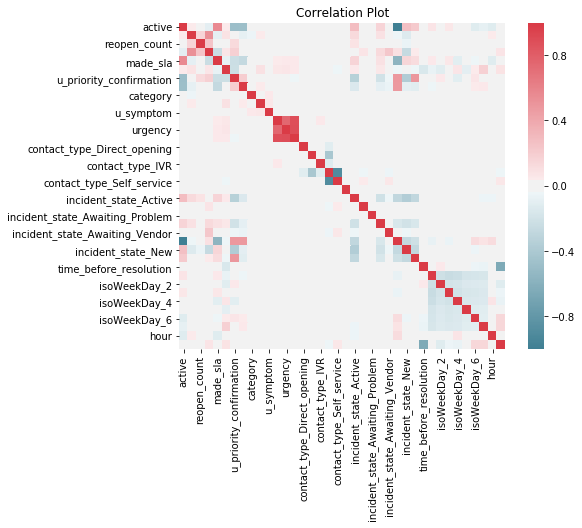

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
cor = df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## 3) Entraînement du modèle

### 3.1) Séparation du train et test set 

In [26]:
from sklearn.model_selection import train_test_split

Séparation de notre dataset en train et test

In [27]:
columns = list(filter(lambda x : x != 'time_before_resolution', df.columns))
X_train,X_test,  y_train, y_test = train_test_split(df[columns], df["time_before_resolution"])

### 3.2) Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
def RFModel(n_arbres):
    algo  = RandomForestRegressor(n_estimators=n_arbres)
    model = algo.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    return score

Entraînement de notre modèle avec différents nombres d'arbres.

In [29]:
n_arbres = [1,2,5,10,20,50,100]
scores_RF = []
for i in range(len(n_arbres)):
    scores_RF.append(RFModel(n_arbres[i]))

In [30]:
print(scores_RF)

[0.498491365448415, 0.6412064607583134, 0.7162276026060987, 0.7449167898180217, 0.7574633754236215, 0.7650197240400901, 0.7681236493928212]


Evolution du score en fonction du nombre d'arbres.

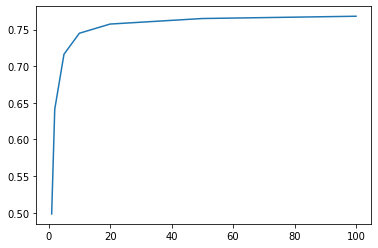

In [32]:
from matplotlib import pyplot
pyplot.plot(n_arbres, scores_RF)
pyplot.show() 

A partir de 20 arbres le score stagne aux alentours de 0,75 ; le score maximum que nous ayons atteint étant avec 100 arbres, on gardera celui-ci pour l'api. 

On garde le modèle ayant le plus haut score

In [33]:
algo100  = RandomForestRegressor(n_estimators=100)
model100 = algo100.fit(X_train, y_train)
score100 = model100.score(X_test, y_test)

### 3.3) Régression Linéaire

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.46203666754717526

## 4) Enregistrer le modèle sur le disque dur

In [ ]:
import pickle as pkl
output_path = "model_RF.pkl"
with open(output_path,"wb") as f: 
    pkl.dump(model100, f)

## 5) Prédire à nouveau à partir du modèle enregistré

In [ ]:
with open(output_path,"rb") as f: 
    model_charged = pkl.load(f)
a_predire = df[columns][100:101]
model_charged.predict(a_predire)

##  6) DJANGO API

Les lignes suivantes m'ont permis d'avoir simplement les lignes en formant json de mes events.

In [37]:
df[1:2].to_json(orient='records')

'[{"active":true,"reassignment_count":0,"reopen_count":0,"sys_mod_count":2,"made_sla":true,"knowledge":true,"u_priority_confirmation":false,"sys_updated_by":510,"category":47,"subcategory":70,"u_symptom":502,"impact":2,"urgency":2,"priority":3,"contact_type_Direct_opening":0,"contact_type_Email":0,"contact_type_IVR":0,"contact_type_Phone":1,"contact_type_Self_service":0,"incident_state_100":0,"incident_state_Active":0,"incident_state_Awaiting_Evidence":0,"incident_state_Awaiting_Problem":0,"incident_state_Awaiting_User_Info":0,"incident_state_Awaiting_Vendor":0,"incident_state_Closed":0,"incident_state_New":0,"incident_state_Resolved":1,"time_before_resolution":92347.0,"isoWeekDay_1":1,"isoWeekDay_2":0,"isoWeekDay_3":0,"isoWeekDay_4":0,"isoWeekDay_5":0,"isoWeekDay_6":0,"isoWeekDay_7":0,"hour":8,"month":2}]'

In [42]:
df[105:106].to_json(orient='records')

'[{"active":true,"reassignment_count":0,"reopen_count":0,"sys_mod_count":0,"made_sla":true,"knowledge":true,"u_priority_confirmation":false,"sys_updated_by":229,"category":33,"subcategory":122,"u_symptom":352,"impact":2,"urgency":2,"priority":3,"contact_type_Direct_opening":0,"contact_type_Email":0,"contact_type_IVR":0,"contact_type_Phone":1,"contact_type_Self_service":0,"incident_state_100":0,"incident_state_Active":0,"incident_state_Awaiting_Evidence":0,"incident_state_Awaiting_Problem":0,"incident_state_Awaiting_User_Info":0,"incident_state_Awaiting_Vendor":0,"incident_state_Closed":0,"incident_state_New":1,"incident_state_Resolved":0,"time_before_resolution":92671.0,"isoWeekDay_1":1,"isoWeekDay_2":0,"isoWeekDay_3":0,"isoWeekDay_4":0,"isoWeekDay_5":0,"isoWeekDay_6":0,"isoWeekDay_7":0,"hour":8,"month":2}]'